In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
train_data = pd.read_excel(r"C:\Users\egboc\OneDrive\Desktop\INTERNSHIP 001\Data_Train.xlsx")

test_data = pd.read_excel(r"C:\Users\egboc\OneDrive\Desktop\INTERNSHIP 001\Data_Test.xlsx")

In [3]:
train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
train_data.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [5]:
test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [6]:
test_data.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


From the dataset, there are missing enteries (NaN) in the "title" and "votes", indicating incomplete data for that record. The cuisines offered by these restaurants cover a broad spectrum. The restaurants have a wide range of operating hours, with most open late into the night. Each restaurant has a unique "RESTAURANT_ID", suggesting the dataset can be used for detailed analysis at the individual restaurant level.

In [7]:
train_data.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

The dataset has a notably high number of missing values in the "VOTES" column (1204 missing entries) and a substantial number of missing "TITLE" entries (1003 missing entries). This indicates a significant portion of the data lacks customer feedback information and classification of establishments, which could impact analyses related to customer preferences and restaurant categorization.

There are missing values in both "CITY" (112 missing entries) and "LOCALITY" (98 missing entries), suggesting that the geographic details of a considerable number of restaurants are incomplete. This gap could hinder location-based analyses, such as understanding regional dining trends or preferences.

There are only 2 missing entries in the "RATING" column, indicating that most restaurants in the dataset have been rated. This suggests that despite the lack of votes for many entries, the dataset still provides a relatively comprehensive overview of customer satisfaction levels across the majority of listed restaurants.

In [8]:
test_data.isnull().sum()

TITLE            284
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

There are missing values in several columns, indicating incomplete information across the dataset. Specifically, the TITLE, CITY, LOCALITY, RATING, and VOTES columns have missing entries.

The VOTES column, with 402 missing entries, has the highest number of missing values. This suggests a substantial portion of the dataset lacks customer feedback, which could impact analyses related to customer preferences or restaurant popularity.

There are a relatively small number of missing values in the RATING, CITY, and LOCALITY columns (2, 35, and 30 missing values respectively), indicating that while most restaurants have their ratings and location information available, a few entries are incomplete. The missing TITLE entries (284) also suggest a significant number of restaurants haven't been categorized by dining establishment type.

In [9]:
train_data.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


Wide Range in Restaurant Costs: The cost for dining at these restaurants varies widely, from as low as 20 units (presumably in the local currency) to as high as 14,000 units. This indicates a diverse range of dining options available, from very affordable to luxury dining experiences.

Average Dining Cost: The average cost of dining at these restaurants is approximately 655 units, with a standard deviation of 627 units. This high standard deviation suggests a significant variation in dining costs, which could be attributed to differences in restaurant types, locations, cuisines offered, and the dining experience itself.

Distribution of Restaurant Costs: The cost distribution is skewed towards the lower end, with 75% of the restaurants costing 800 units or less for dining. However, there's a long tail extending to 14,000 units, indicating that while most restaurants are relatively affordable, there are some that are significantly more expensive.

In [11]:
test_data.describe()

,RESTAURANT_ID
count,4231.000000
mean,7791.438431
std,4458.797621
min,3.000000
25%,3908.500000
50%,7798.000000
75%,11634.000000
max,15572.000000


The RESTAURANT_ID ranges from a minimum of 3 to a maximum of 15,572, indicating a wide distribution of restaurant identifiers in the dataset. The standard deviation of 4,458.8 suggests there is considerable variability in the RESTAURANT_ID values, reflecting a broad and diverse dataset of restaurants.

The mean RESTAURANT_ID is 7,791.44, which is close to the median (or 50th percentile) value of 7,798. This near-equality between the mean and median suggests a relatively symmetric distribution of restaurant IDs across the dataset, with no significant skewness toward higher or lower values.

The 25th and 75th percentiles are 3,908.5 and 11,634 respectively. This indicates that 50% of the restaurant IDs are between these two values, showing that the middle half of the dataset is spread across a wide range of ID values but concentrated away from the extremes.

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3947 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [14]:
average_cost_per_restaurant = train_data.groupby('RESTAURANT_ID')['COST'].mean().reset_index()
average_cost_per_restaurant = average_cost_per_restaurant.sort_values(by='COST')
sampled_restaurants = average_cost_per_restaurant.sample(n=100, random_state=42).sort_values(by='COST')

The "above" calculates the average cost per restaurant from dataset, then randomly selects and sorts 100 restaurants based on their average cost.

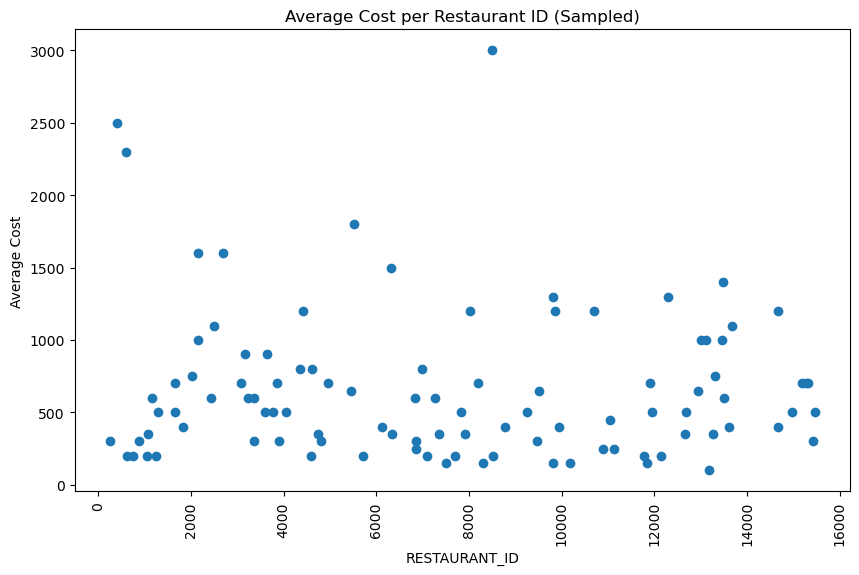

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(sampled_restaurants['RESTAURANT_ID'], sampled_restaurants['COST'])
plt.xlabel('RESTAURANT_ID')
plt.ylabel('Average Cost')
plt.title('Average Cost per Restaurant ID (Sampled)')
plt.xticks(rotation=90)
plt.show()

The scatter plot illustrates the average cost associated with each of the sampled restaurant IDs, showing that the majority of restaurants have an average cost below 1000, with a few exceptions reaching up to 3000.

The data points are spread across a wide range of costs, indicating variability in the average cost among the sampled restaurants, with some outliers particularly above the 2000 cost mark.

There appears to be no clear pattern or correlation between the restaurant ID and the average cost, suggesting that the restaurant ID is not a determinant of the average cost, and the distribution of costs among the sampled restaurants is relatively dispersed.

In [16]:
train_data['RATING'] = pd.to_numeric(train_data['RATING'], errors='coerce')

train_data['RATING'].fillna(train_data['RATING'].mean(), inplace=True)

train_data['VOTES'] = train_data['VOTES'].str.replace(' votes', '').astype(float)

train_data['VOTES'].fillna(0, inplace=True)

In [17]:
categorical_features = ['TITLE', 'CITY', 'LOCALITY', 'CUISINES']
numerical_features = ['RATING', 'VOTES']

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [19]:
X = train_data.drop('COST', axis=1)
y = train_data['COST']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

The above segment is intended to segregate the dataset into training and validation subsets, thereby facilitating the training of machine learning models on one portion of the data and evaluating their performance on a separate, unseen portion to ensure that the model can generalize well to new data.

In [20]:
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

In [21]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['RATING', 'VOTES']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['TITLE', 'CITY', 'LOCALITY',
                                                   'CUISINES'])])),
                ('regressor', LinearRegression())])

In [22]:
y_pred = lr_model.predict(X_val)
print(f'Linear Regression RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')

Linear Regression RMSE: 342.0326588352175


The Root Mean Square Error (RMSE) of 342.03 for the Linear Regression model indicates that, on average, the model's predictions deviate from the actual restaurant meal costs by approximately 342.03 units of the currency used in the dataset.

In [23]:
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
print(f'Random Forest RMSE: {mean_squared_error(y_val, y_pred_rf, squared=False)}')

Random Forest RMSE: 313.7328276772995


The RMSE (Root Mean Square Error) of 313.73 for the Random Forest model indicates that, on average, the model's predictions of the restaurant food cost deviate from the actual costs by approximately 313.73 units of currency.

The Linear Regression model yielded an RMSE of 342.03, indicating the average deviation between the model's predictions and the actual costs. The Random Forest Regressor, a more complex model, improved prediction accuracy with an RMSE of 313.73. This suggests that the Random Forest model, with its ability to capture non-linear relationships and interactions between features, is more effective for this particular prediction task.

In [24]:
predictions = rf_model.predict(train_data)

In [25]:
print(predictions[:5])

[ 630.  1486.   712.5  368.5  310.5]


In [27]:
importances = rf_model.named_steps['regressor'].feature_importances_


preprocessor = rf_model.named_steps['preprocessor']
categorical_features_transformed = preprocessor.named_transformers_['cat'].get_feature_names_out()
numerical_features_transformed = numerical_features
all_feature_names = np.concatenate([numerical_features_transformed, categorical_features_transformed])

forest_importances = pd.Series(importances, index=all_feature_names)

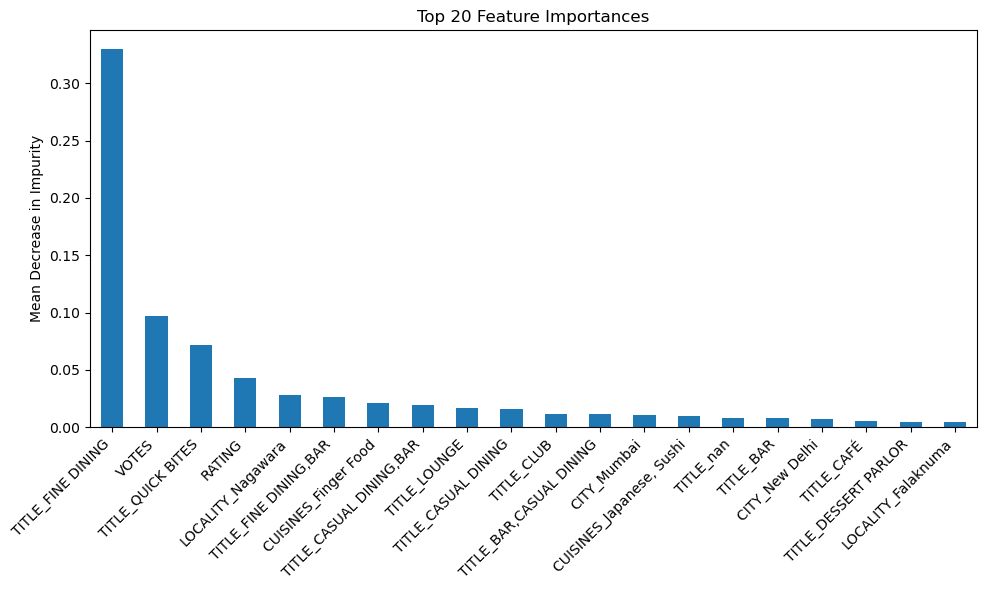

In [29]:
top_n = 20
sorted_importances = forest_importances.sort_values(ascending=False)[:top_n]

plt.figure(figsize=(10, 6)) 
sorted_importances.plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.ylabel('Mean Decrease in Impurity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart displays the top 20 features ranked by their importance in a predictive model, with 'TITLE_FINE DINING' having the highest mean decrease in impurity, indicating it is the most influential feature in the model's decisions.

The importance of features rapidly decreases after 'VOTES' and 'RATING', with subsequent features such as 'LOCALITY_Nawabara', 'TITLE_CASUAL DINING_BAR', and 'CITY_Mumbai' having a much lower impact on the model's predictions.

In [30]:
def categorize_time(time_str):
    if 'morning' in time_str.lower():
        return 'Breakfast'
    elif 'noon' in time_str.lower() or 'lunch' in time_str.lower():
        return 'Lunch'
    elif 'evening' in time_str.lower() or 'dinner' in time_str.lower():
        return 'Dinner'
    else:
        return 'Other'

train_data['TIME_CATEGORY'] = train_data['TIME'].apply(categorize_time)

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],}

In [32]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['RATING',
                                                                          'VOTES']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['TITLE',
                                                                          'CITY',
                                                                          'LOCALITY',
                                                                          'CUISINES'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [33]:
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Best parameters: {'regressor__max_depth': 30, 'regressor__n_estimators': 200}
Best RMSE: 360.06082909215297


The grid search has found the best parameters to be a max_depth of 30 and n_estimators of 200. The best Root Mean Square Error (RMSE) achieved on the training data during the cross-validation process is approximately 360.06.

In [34]:
optimized_rf = RandomForestRegressor(max_depth=grid_search.best_params_['regressor__max_depth'],
                                     n_estimators=grid_search.best_params_['regressor__n_estimators'],
                                     random_state=42)

optimized_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', optimized_rf)])

In [37]:
optimized_pipeline.fit(X_train, y_train)

X_train_preprocessed = optimized_pipeline.named_steps['preprocessor'].transform(X_train)

In [39]:
predictions_test = optimized_pipeline.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, predictions_test))
print(f"Train RMSE: {train_rmse}")

Train RMSE: 178.39290655077042


The training RMSE of the optimized Random Forest model, approximately 178.39, significantly improves upon the initial models, demonstrating the effectiveness of hyperparameter tuning in refining the model's predictive accuracy.
This step underscores the importance of iterative model evaluation and adjustment in achieving optimal performance in machine learning tasks.

The process outlined illustrates a comprehensive approach to building and refining a machine learning model for predicting restaurant meal costs. Initially, it involves preprocessing the data, including handling missing values and encoding categorical variables, followed by partitioning the dataset into training and validation sets to facilitate model development and evaluation.

Two predictive models, Linear Regression and Random Forest Regressor, were trained and assessed using the Root Mean Square Error (RMSE) metric. The Random Forest Regressor showed better performance, indicating its superior capability in handling the complexity and non-linearity of the dataset.

Further analysis revealed the importance of various features in predicting meal costs, with 'TITLE_FINE DINING', 'VOTES', and 'RATING' being the most influential. This insight is valuable for understanding factors that significantly impact restaurant meal pricing.

Additionally, the introduction of new features and hyperparameter tuning through grid search optimization further improved the model's accuracy, demonstrating the importance of feature engineering and model optimization in enhancing predictive performance.

Overall, the steps taken represent a thorough approach to predictive modeling, from data preparation and feature engineering to model selection, evaluation, and optimization. This methodology not only ensures the development of a robust model but also provides insights into the data and factors influencing meal costs, which can inform strategic decisions in the restaurant industry.